In [1]:
%load_ext autoreload
%autoreload 2

In [18]:
from glob import glob 

import pandas as pd

from fastcore.xtras import load_pickle
from scipy.stats import sem
from gptchem.settings import ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH

import matplotlib.pyplot as plt 
import matplotlib as mpl
import matplotx
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use(['science', 'nature'])

%matplotlib inline

## Load results

In [19]:
all_out = glob("out/**/*.pkl")

In [20]:
all_out = [load_pickle(p) for p in all_out]

In [21]:
extracted_res = []
xgboost_results = []
tabpfn_results = []
rf_results = []
gpr_results = []

for out in all_out: 
    try:
        res = {
            'train_size': out['num_train_points'],
            'frac_valid': out['frac_valid'],
            'accuracy': out['accuracy'],
            'f1_macro': out['f1_macro'],
            'f1_micro': out['f1_micro'],
            'kappa': out['kappa'],
            "num_classes": out['num_classes'],
            "representation": out['representation']
        }
        extracted_res.append(res)
    except KeyError:
        pass

    xgb_res = {
        'train_size': out['num_train_points'], 
        'accuracy': out['xgb']['accuracy'], 
        'f1_macro': out['xgb']['f1_macro'],
        'f1_micro': out['xgb']['f1_micro'],
        'kappa': out['xgb']['kappa'],
        "num_classes": out['num_classes']
    }

    tabpfn_res = {
        'train_size': out['num_train_points'], 
        'accuracy': out['tabpfn']['accuracy'], 
        'f1_macro': out['tabpfn']['f1_macro'],
        'f1_micro': out['tabpfn']['f1_micro'],
        'kappa': out['tabpfn']['kappa'],
        "num_classes": out['num_classes']
    }


    rf_res = {
        'train_size': out['num_train_points'], 
        'accuracy': out['rf']['accuracy'], 
        'f1_macro': out['rf']['f1_macro'],
        'f1_micro': out['rf']['f1_micro'],
        'kappa': out['rf']['kappa'],
        "num_classes": out['num_classes']
    }
    
    gpr_res = {
        'train_size': out['num_train_points'], 
        'accuracy': out['gpr']['accuracy'], 
        'f1_macro': out['gpr']['f1_macro'],
        'f1_micro': out['gpr']['f1_micro'],
        'kappa': out['gpr']['kappa'],
        "num_classes": out['num_classes']
    }

    xgboost_results.append(xgb_res)
    tabpfn_results.append(tabpfn_res)
    rf_results.append(rf_res)
    gpr_results.append(gpr_res)

In [22]:
res = pd.DataFrame(extracted_res)
xgboost_res = pd.DataFrame(xgboost_results)
tabpfn_res = pd.DataFrame(tabpfn_results)
rf_res = pd.DataFrame(rf_results)
gpr_res = pd.DataFrame(gpr_results)

In [23]:
grouped_res = res.groupby(['num_classes', "representation", 'train_size']).agg(['mean', 'std', sem])

/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(

In [24]:
grouped_xgboost_res = xgboost_res.groupby(['num_classes', 'train_size']).agg(['mean', 'std', sem])

In [25]:
grouped_tabpfn_res = tabpfn_res.groupby(['num_classes', 'train_size']).agg(['mean', 'std', sem])

In [26]:
grouped_rf_res = rf_res.groupby(['num_classes', 'train_size']).agg(['mean', 'std', sem])

In [27]:
grouped_gpr_res = gpr_res.groupby(['num_classes', 'train_size']).agg(['mean', 'std', sem])

In [28]:
grouped_res

frac_valid            accuracy  \
                                            mean  std  sem      mean   
num_classes representation train_size                                  
2           InChI          10                1.0  0.0  0.0  0.506000   
                           50                1.0  0.0  0.0  0.516000   
                           100               1.0  0.0  0.0  0.545333   
                           200               1.0  0.0  0.0  0.572000   
                           500               1.0  NaN  NaN  0.640000   
            SELFIES        10                1.0  0.0  0.0  0.532000   
                           50                1.0  0.0  0.0  0.521333   
                           100               1.0  0.0  0.0  0.557333   
                           200               1.0  0.0  0.0  0.566000   
                           500               1.0  NaN  NaN  0.648000   
            SMILES         10                1.0  0.0  0.0  0.495000   
                           50                1.0  0.0  0.0  0.578000   
                           100               1.0  0.0  0.0  0.597333   
                           200               1.0  0.0  0.0  0.601333   
                           500               1.0  NaN  NaN  0.636000   
5           InChI          50                1.0  NaN  NaN  0.256000   
                           100               1.0  NaN  NaN  0.244000   
            SELFIES        50                1.0  NaN  NaN  0.200000   
                           100               1.0  NaN  NaN  0.268000   
            SMILES         50                1.0  NaN  NaN  0.212000   
                           100               1.0  NaN  NaN  0.212000   

                                                           f1_macro            \
                                            std       sem      mean       std   
num_classes representation train_size                                           
2           InChI          10          0.045782  0.022891  0.439874  0.088708   
                           50          0.047159  0.027227  0.508819  0.044402   
                           100         0.036295  0.020955  0.544396  0.034931   
                           200         0.016971  0.012000  0.567941  0.015238   
                           500              NaN       NaN  0.638124       NaN   
            SELFIES        10          0.014967  0.007483  0.515020  0.006187   
                           50          0.066493  0.038390  0.517512  0.068730   
                           100         0.042771  0.024694  0.556690  0.042753   
                           200         0.031113  0.022000  0.564883  0.031562   
                           500              NaN       NaN  0.647910       NaN   
            SMILES         10          0.013216  0.006608  0.478831  0.019622   
                           50          0.037310  0.018655  0.577443  0.036824   
                           100         0.048881  0.028221  0.593792  0.050868   
                           200         0.026633  0.015377  0.599885  0.027304   
                           500              NaN       NaN  0.635528       NaN   
5           InChI          50               NaN       NaN  0.247067       NaN   
                           100              NaN       NaN  0.231802       NaN   
            SELFIES        50               NaN       NaN  0.201369       NaN   
                           100              NaN       NaN  0.261968       NaN   
            SMILES         50               NaN       NaN  0.192380       NaN   
                           100              NaN       NaN  0.197783       NaN   

                                                 f1_micro                      \
                                            sem      mean       std       sem   
num_classes representation train_size                                           
2           InChI          10          0.044354  0.506000  0.045782  0.022891   
                           50          0

In [29]:
grouped_tabpfn_res

accuracy                      f1_macro            \
                            mean       std       sem      mean       std   
num_classes train_size                                                     
2           10          0.572000  0.015350  0.004431  0.557292  0.022544   
            50          0.572800  0.010119  0.003200  0.571968  0.010205   
            100         0.584000  0.018330  0.006110  0.580219  0.018748   
            200         0.629714  0.015119  0.005714  0.627744  0.015131   
            500         0.644000  0.000000  0.000000  0.643309  0.000000   
5           50          0.272000  0.000000  0.000000  0.262553  0.000000   
            100         0.284000  0.000000  0.000000  0.264002  0.000000   

                                  f1_micro                         kappa  \
                             sem      mean       std       sem      mean   
num_classes train_size                                                     
2           10          0.006508  0.572000  0.015350  0.004431  0.144000   
            50          0.003227  0.572800  0.010119  0.003200  0.145600   
            100         0.006249  0.584000  0.018330  0.006110  0.168000   
            200         0.005719  0.629714  0.015119  0.005714  0.259429   
            500         0.000000  0.644000  0.000000  0.000000  0.288000   
5           50          0.000000  0.272000  0.000000  0.000000  0.090000   
            100         0.000000  0.284000  0.000000  0.000000  0.105000   

                                                
                             std           sem  
num_classes train_size                          
2           10          0.030701  8.862587e-03  
            50          0.020239  6.400000e-03  
            100         0.036661  1.222020e-02  
            200         0.030237  1.142857e-02  
            500         0.000000  0.000000e+00  
5           50          0.000000  0.000000e+00  
            100         0.000000  9.813078e-18

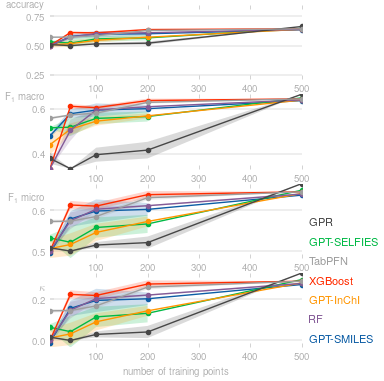

In [30]:
with plt.style.context(matplotx.styles.dufte):
    fig, ax = plt.subplots(4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH))

    # plot the binary case, i.e. num_classes = 2

    for i, metric in enumerate(['accuracy', 'f1_macro', 'f1_micro', 'kappa']):
        ax[i].plot(
            grouped_res.loc[2, 'SMILES', :].index,
            grouped_res.loc[2, 'SMILES', :][metric]['mean'],
            marker='o',
            label='GPT-SMILES',
        )
        ax[i].fill_between(
            grouped_res.loc[2, 'SMILES', :].index,
            grouped_res.loc[2, 'SMILES', :][metric]['mean'] - grouped_res.loc[2, 'SMILES', :][metric]['sem'],
            grouped_res.loc[2, 'SMILES', :][metric]['mean'] + grouped_res.loc[2, 'SMILES', :][metric]['sem'],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_res.loc[2, 'SELFIES', :].index,
            grouped_res.loc[2, 'SELFIES', :][metric]['mean'],
            marker='o',
            label='GPT-SELFIES',
        )
        ax[i].fill_between(
            grouped_res.loc[2, 'SELFIES', :].index,
            grouped_res.loc[2, 'SELFIES', :][metric]['mean'] - grouped_res.loc[2, 'SELFIES', :][metric]['sem'],
            grouped_res.loc[2, 'SELFIES', :][metric]['mean'] + grouped_res.loc[2, 'SELFIES', :][metric]['sem'],
            alpha=0.2,
        )


        ax[i].plot(
            grouped_res.loc[2, 'InChI', :].index,
            grouped_res.loc[2, 'InChI', :][metric]['mean'],
            marker='o',
            label='GPT-InChI',
        )
        ax[i].fill_between(
            grouped_res.loc[2, 'InChI', :].index,
            grouped_res.loc[2, 'InChI', :][metric]['mean'] - grouped_res.loc[2, 'InChI', :][metric]['sem'],
            grouped_res.loc[2, 'InChI', :][metric]['mean'] + grouped_res.loc[2, 'InChI', :][metric]['sem'],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_xgboost_res.loc[2,:].index,
            grouped_xgboost_res.loc[2,:][metric]['mean'],
            marker='o',
            label='XGBoost'
        )
        ax[i].fill_between(
            grouped_xgboost_res.loc[2,:].index,
            grouped_xgboost_res.loc[2,:][metric]['mean'] - grouped_xgboost_res.loc[2,:][metric]['sem'],
            grouped_xgboost_res.loc[2,:][metric]['mean'] + grouped_xgboost_res.loc[2,:][metric]['sem'],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_rf_res.loc[2,:].index,
            grouped_rf_res.loc[2,:][metric]['mean'],
            marker='o',
            label='RF'
        )
        ax[i].fill_between(
            grouped_rf_res.loc[2,:].index,
            grouped_rf_res.loc[2,:][metric]['mean'] - grouped_rf_res.loc[2,:][metric]['sem'],
            grouped_rf_res.loc[2,:][metric]['mean'] + grouped_rf_res.loc[2,:][metric]['sem'],
            alpha=0.2,
        )


        ax[i].plot(
            grouped_gpr_res.loc[2,:].index,
            grouped_gpr_res.loc[2,:][metric]['mean'],
            marker='o',
            label='GPR'
        )
        ax[i].fill_between(
            grouped_gpr_res.loc[2,:].index,
            grouped_gpr_res.loc[2,:][metric]['mean'] - grouped_gpr_res.loc[2,:][metric]['sem'],
            grouped_gpr_res.loc[2,:][metric]['mean'] + grouped_gpr_res.loc[2,:][metric]['sem'],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_tabpfn_res.loc[2,:].index,
            grouped_tabpfn_res.loc[2,:][metric]['mean'],
            marker='o',
            label='TabPFN'
        )
        ax[i].fill_between(
            grouped_tabpfn_res.loc[2,:].index,
            grouped_tabpfn_res.loc[2,:][metric]['mean'] - grouped_tabpfn_res.loc[2,:][metric]['sem'],
            grouped_tabpfn_res.loc[2,:][metric]['mean'] + grouped_tabpfn_res.loc[2,:][metric]['sem'],
            alpha=0.2,
        )

    matplotx.line_labels(ax[-1], fontsize=8)
    ax[0].set_ylim(0.21,0.85)
    matplotx.ylabel_top('accuracy', ax=ax[0])
    matplotx.ylabel_top(r'F$_{1}$ macro', ax=ax[1])
    matplotx.ylabel_top(r'F$_{1}$ micro', ax=ax[2])
    matplotx.ylabel_top(r'$\kappa$', ax=ax[3])
    ax[-1].set_xlabel('number of training points', labelpad=4)

    fig.savefig('opv-classification_results_2_class.pdf', bbox_inches='tight')

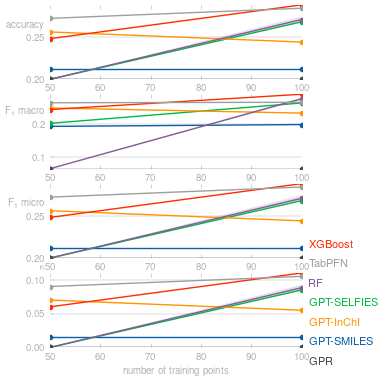

In [31]:
with plt.style.context(matplotx.styles.dufte):
    fig, ax = plt.subplots(4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH))

    # plot the binary case, i.e. num_classes = 2

    for i, metric in enumerate(['accuracy', 'f1_macro', 'f1_micro', 'kappa']):
        ax[i].plot(
            grouped_res.loc[5, 'SMILES', :].index,
            grouped_res.loc[5, 'SMILES', :][metric]['mean'],
            marker='o',
            label='GPT-SMILES',
        )
        ax[i].fill_between(
            grouped_res.loc[5, 'SMILES', :].index,
            grouped_res.loc[5, 'SMILES', :][metric]['mean'] - grouped_res.loc[5, 'SMILES', :][metric]['sem'],
            grouped_res.loc[5, 'SMILES', :][metric]['mean'] + grouped_res.loc[5, 'SMILES', :][metric]['sem'],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_res.loc[5, 'SELFIES', :].index,
            grouped_res.loc[5, 'SELFIES', :][metric]['mean'],
            marker='o',
            label='GPT-SELFIES',
        )
        ax[i].fill_between(
            grouped_res.loc[5, 'SELFIES', :].index,
            grouped_res.loc[5, 'SELFIES', :][metric]['mean'] - grouped_res.loc[5, 'SELFIES', :][metric]['sem'],
            grouped_res.loc[5, 'SELFIES', :][metric]['mean'] + grouped_res.loc[5, 'SELFIES', :][metric]['sem'],
            alpha=0.2,
        )


        ax[i].plot(
            grouped_res.loc[5, 'InChI', :].index,
            grouped_res.loc[5, 'InChI', :][metric]['mean'],
            marker='o',
            label='GPT-InChI',
        )
        ax[i].fill_between(
            grouped_res.loc[5, 'InChI', :].index,
            grouped_res.loc[5, 'InChI', :][metric]['mean'] - grouped_res.loc[5, 'InChI', :][metric]['sem'],
            grouped_res.loc[5, 'InChI', :][metric]['mean'] + grouped_res.loc[5, 'InChI', :][metric]['sem'],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_xgboost_res.loc[5,:].index,
            grouped_xgboost_res.loc[5,:][metric]['mean'],
            marker='o',
            label='XGBoost'
        )
        ax[i].fill_between(
            grouped_xgboost_res.loc[5,:].index,
            grouped_xgboost_res.loc[5,:][metric]['mean'] - grouped_xgboost_res.loc[5,:][metric]['sem'],
            grouped_xgboost_res.loc[5,:][metric]['mean'] + grouped_xgboost_res.loc[5,:][metric]['sem'],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_rf_res.loc[5,:].index,
            grouped_rf_res.loc[5,:][metric]['mean'],
            marker='o',
            label='RF'
        )
        ax[i].fill_between(
            grouped_rf_res.loc[5,:].index,
            grouped_rf_res.loc[5,:][metric]['mean'] - grouped_rf_res.loc[5,:][metric]['sem'],
            grouped_rf_res.loc[5,:][metric]['mean'] + grouped_rf_res.loc[5,:][metric]['sem'],
            alpha=0.2,
        )


        ax[i].plot(
            grouped_gpr_res.loc[5,:].index,
            grouped_gpr_res.loc[5,:][metric]['mean'],
            marker='o',
            label='GPR'
        )
        ax[i].fill_between(
            grouped_gpr_res.loc[5,:].index,
            grouped_gpr_res.loc[5,:][metric]['mean'] - grouped_gpr_res.loc[5,:][metric]['sem'],
            grouped_gpr_res.loc[5,:][metric]['mean'] + grouped_gpr_res.loc[5,:][metric]['sem'],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_tabpfn_res.loc[5,:].index,
            grouped_tabpfn_res.loc[5,:][metric]['mean'],
            marker='o',
            label='TabPFN'
        )
        ax[i].fill_between(
            grouped_tabpfn_res.loc[5,:].index,
            grouped_tabpfn_res.loc[5,:][metric]['mean'] - grouped_tabpfn_res.loc[5,:][metric]['sem'],
            grouped_tabpfn_res.loc[5,:][metric]['mean'] + grouped_tabpfn_res.loc[5,:][metric]['sem'],
            alpha=0.2,
        )

    matplotx.line_labels(ax[-1], fontsize=8)
    matplotx.ylabel_top('accuracy', ax=ax[0])
    matplotx.ylabel_top(r'F$_{1}$ macro', ax=ax[1])
    matplotx.ylabel_top(r'F$_{1}$ micro', ax=ax[2])
    matplotx.ylabel_top(r'$\kappa$', ax=ax[3])
    ax[-1].set_xlabel('number of training points', labelpad=4)
    fig.savefig('opv-classification_results_5_class.pdf', bbox_inches='tight')